# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

Load the wine dataset using sklearn and get the datasets X and y containing the target and the rest of the variables

In [2]:
# Import wine dataset and encapsule in a variable
from sklearn.datasets import load_wine
wine = load_wine()

In [3]:
# Generate X and y variables
X = wine.data
y = wine.target

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [4]:
# Import Kmeans model from sklearn
from sklearn.cluster import KMeans

# Import silhouette_score from sklearn
from sklearn.metrics import silhouette_score

In [5]:
# Generate clustering model with KMeans with 8 k
cl =KMeans(8)

# Fit the model
cl.fit(X)

# Check silhouette_score
silhouette_score(X, cl.labels_)

0.5406824747857625

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [6]:
# Generate clustering model with KMeans with 5 k
cl =KMeans(5)

# Fit the model
cl.fit(X)

# Check silhouette_score
silhouette_score(X, cl.labels_)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [7]:
# Generate clustering model with KMeans with 3 k
cl =KMeans(3)

# Fit the model
cl.fit(X)

# Check silhouette_score
silhouette_score(X, cl.labels_)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [8]:
# Import KElbowVisualizer from yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [9]:
# Generate clustering model with KMeans with no k
cl = KMeans()

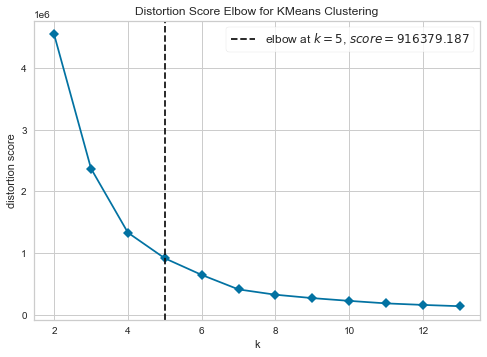

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
# Generate visualizer with k range between 3 and 13 (numebr of features), metric silhouette and timings=False
visualizer = KElbowVisualizer( cl, k=(2,14), metric='distortion', timings=False)

# Fit and show visualizer
visualizer.fit(X)
visualizer.show()

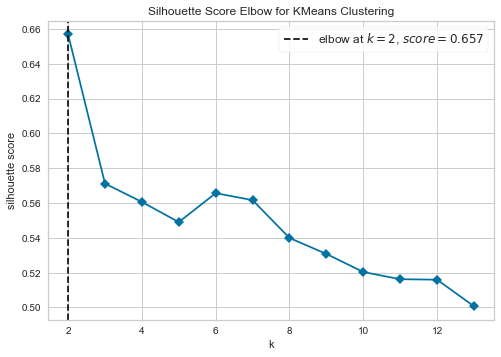

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [11]:
# Generate visualizer with k range between 3 and 13 (numebr of features), metric silhouette and timings=False
visualizer = KElbowVisualizer( cl, k=(2,14), metric='silhouette', timings=False)

# Fit and show visualizer
visualizer.fit(X)
visualizer.show()

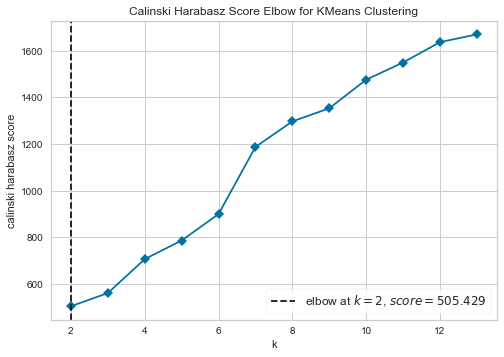

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [12]:
# Generate visualizer with k range between 3 and 13 (numebr of features), metric silhouette and timings=False
visualizer = KElbowVisualizer( cl, k=(2,14), metric='calinski_harabasz', timings=False)

# Fit and show visualizer
visualizer.fit(X)
visualizer.show()

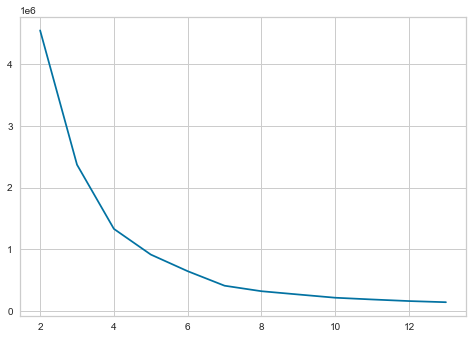

In [13]:
# Check the method I have seen up to know - use inertia_
inercias = [KMeans(k).fit(X).inertia_ for k in range(2,14)]
plt.plot(range(2,14), inercias)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

In [14]:
# Import AgglomerativeClustering from sklearn
from sklearn.cluster import AgglomerativeClustering

In [15]:
# Generate clustering model with AgglomerativeClustering
cl = AgglomerativeClustering()

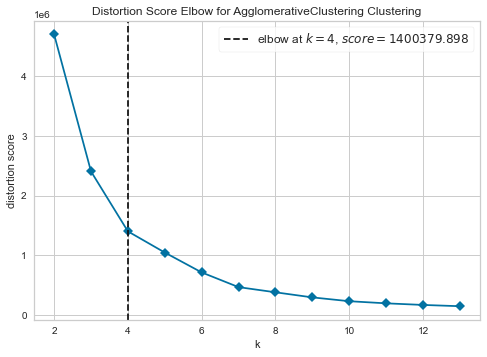

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
# Generate visualizer with k range between 3 and 13, metric silhouette and timings=False
visualizer = KElbowVisualizer( cl, k=(2,14), metric='distortion', timings=False)

# Fit and show visualizer
visualizer.fit(X)
visualizer.show()

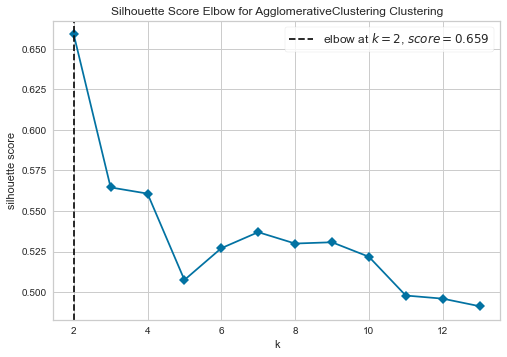

<AxesSubplot:title={'center':'Silhouette Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
# Generate visualizer with k range between 3 and 13, metric silhouette and timings=False
visualizer = KElbowVisualizer( cl, k=(2,14), metric='silhouette', timings=False)

# Fit and show visualizer
visualizer.fit(X)
visualizer.show()

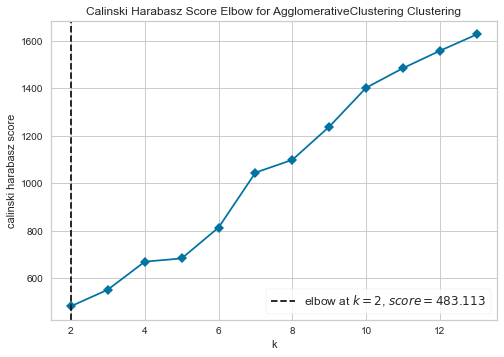

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [18]:
# Generate visualizer with k range between 3 and 13, metric silhouette and timings=False
visualizer = KElbowVisualizer( cl, k=(2,14), metric='calinski_harabasz', timings=False)

# Fit and show visualizer
visualizer.fit(X)
visualizer.show()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [19]:
# Generate a Dataframe
# Concat 2 Dataframes: one with data and one with target
# Check dataframe
wine = pd.concat([pd.DataFrame(load_wine(as_frame=True)['data']), pd.DataFrame(load_wine(as_frame=True)['target'])], axis=1)
wine.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [20]:
# As we saw, there are Elbow test that suggest to use K=2 and K=4 as well...

## K = 2

In [21]:
# Improt seaborn
import seaborn as sns

# Selected bins
bin1 = ['alcohol','malic_acid','ash','labels']
bin2 = ['alcalinity_of_ash','magnesium','total_phenols','labels']
bin3 = ['flavanoids','nonflavanoid_phenols','proanthocyanins','labels']
bin4 = ['color_intensity','hue','od280/od315_of_diluted_wines','proline','labels']

# Labels
wine['labels'] = KMeans(2).fit(X).labels_

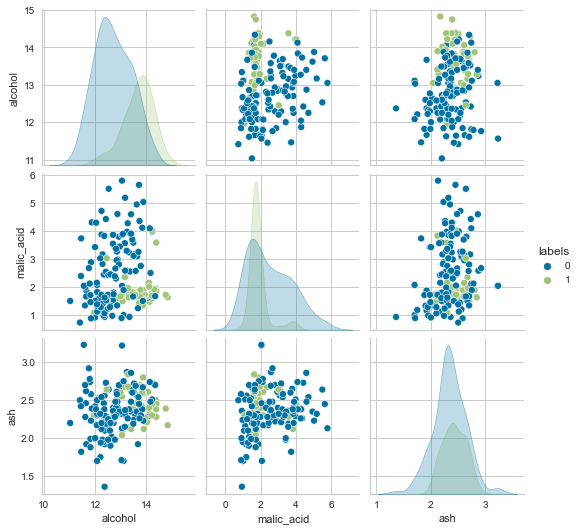

In [22]:
# First bin
sns.pairplot(data=wine[bin1], hue='labels')

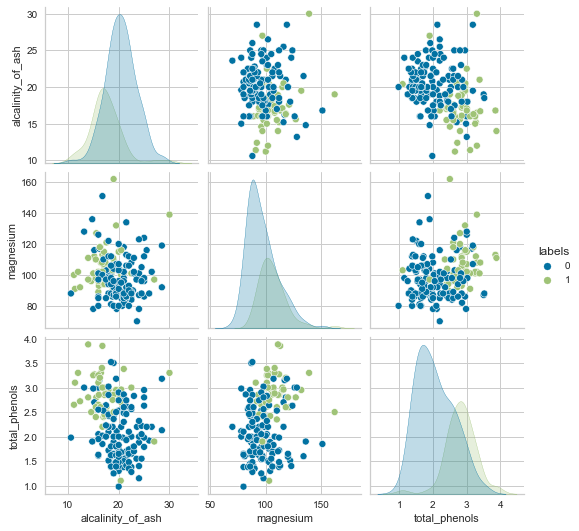

In [23]:
# Second bin
sns.pairplot(data=wine[bin2], hue='labels')

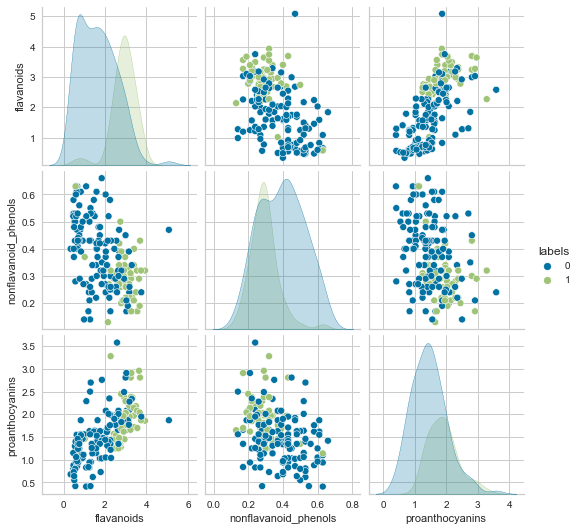

In [24]:
# Third bin
sns.pairplot(data=wine[bin3], hue='labels')

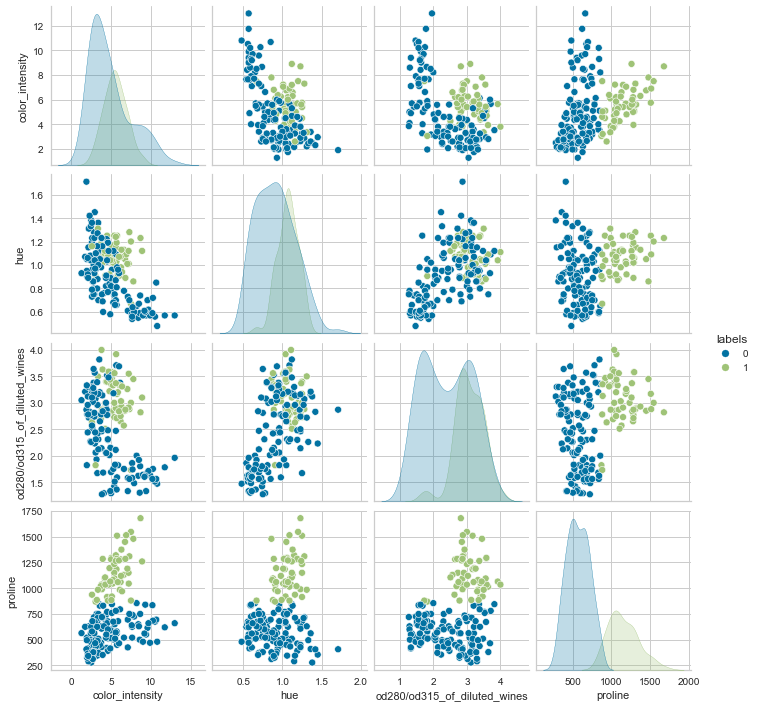

In [25]:
# Fourth bin
sns.pairplot(data=wine[bin4], hue='labels')

### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [26]:
# Improt PCA from sklearn
from sklearn.decomposition import PCA

<AxesSubplot:>

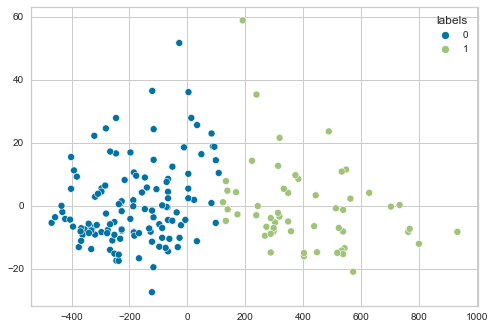

In [27]:
# Generate PCA model
pca = PCA()

# Create the new dimension, with same features as wine dataframe
pc = pca.fit_transform(X)

# Plot the first two components
sns.scatterplot(x= pc[:,0], y= pc[:,1], hue=wine['labels'])

## K = 4

In [28]:
# Labels
wine['labels'] = KMeans(4).fit(X).labels_

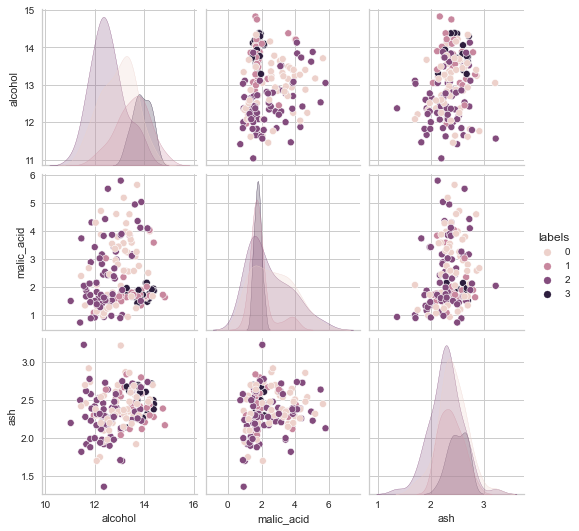

In [29]:
# First bin
sns.pairplot(data=wine[bin1], hue='labels')

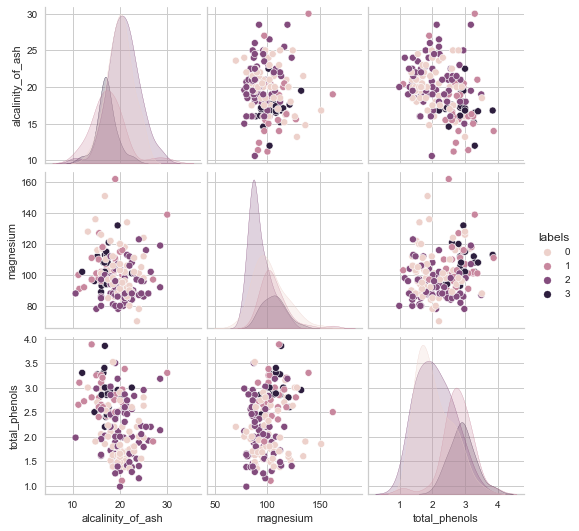

In [30]:
# Second bin
sns.pairplot(data=wine[bin2], hue='labels')

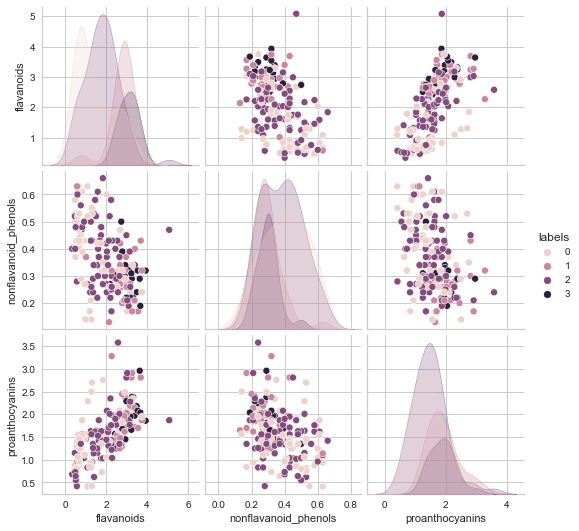

In [31]:
# Third bin
sns.pairplot(data=wine[bin3], hue='labels')

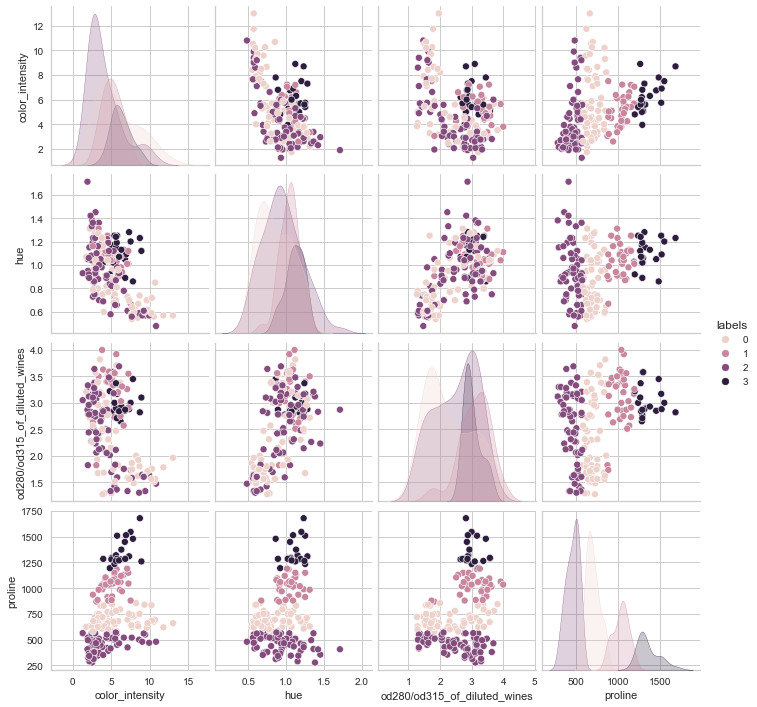

In [32]:
# Fourth bin
sns.pairplot(data=wine[bin4], hue='labels')

### Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

<AxesSubplot:>

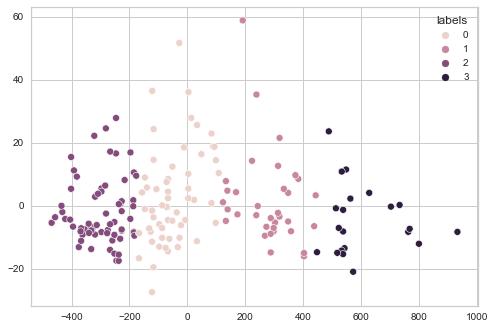

In [33]:
# Generate PCA model
pca = PCA()

# Create the new dimension, with same features as wine dataframe
pc = pca.fit_transform(X)

# Plot the first two components
sns.scatterplot(x= pc[:,0], y= pc[:,1], hue=wine['labels'])